<a href="https://colab.research.google.com/github/callmeAyanda/Machine-Learning/blob/main/LoanRepayment_RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

exploring the dataset

In [2]:
data = pd.read_csv('Data.csv')
data

,Customer ID,LoanID,Last Name,First Name,Principal,Released,Maturity,Due,Paid,Balance,Principal paid,Principal Balance,Monthly repayment,Interest,Loan Tenor,Loan status
0,CW1000235,CW1000235-1,Oluwatomilayo Wuraola,Banke,"150,000.00",1/17/2018,7/30/2024,"221,100.08","221,100.00",0.08,NaN,0.08,9212.5,67600.08,NaN,NaN
1,CW1000226,CW1000226-1,Olutosin Taiwo,Olufunmilayo,"70,000.00",1/17/2018,8/6/2018,"104,520.00","104,520.00",0,NaN,0.00,17420.0,33570.00,NaN,NaN
2,CW1000001,CW1000001-1,Bakare,Olufemi,"50,000.00",10/30/2017,2/5/2018,"73,500.00","73,500.00",0,NaN,0.00,24500.0,23050.00,NaN,NaN
3,CW1000002,CW1000002-1,Shehu,Muhammad,"100,000.00",11/27/2017,3/5/2018,"131,550.01","131,550.01",0,NaN,0.00,43850.0,30800.01,NaN,NaN
4,CW1000003,CW1000003-1,Emeaso,Jonah,"100,000.00",1/23/2018,8/10/2018,"147,720.00","147,720.00",0,NaN,0.00,24620.0,46470.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,CW1000015,NaN,Anastenia Okoye,Chiamaka,"48,400.00",1/2/2024,2/10/2025,"1,031,250.00","579,710.32",451539.68,NaN,NaN,NaN,NaN,NaN,NaN
269,CW1000016,NaN,Chidi Ajuluchukwu,Anthonia,"200,000.00",1/2/2024,2/10/2025,"100,357.00","33,542.14",66814.86,NaN,NaN,NaN,NaN,NaN,NaN
270,CW1000017,NaN,Samuel,Osadare,"105,000.00",1/2/2024,2/10/2025,"412,500.00","67,205.16",345294.84,NaN,NaN,NaN,NaN,NaN,NaN
271,CW1000019,NaN,Kehinde Aboderin,David,"100,000.00",1/2/2024,2/10/2025,"216,562.56","154,881.71",61680.85,NaN,NaN,NaN,NaN,NaN,NaN


target variable can include: [Loan Status] : column to check whether the loan is 'Active', 'Default', 'Closed', etc.

another target variable can include: [Principal Balance] or [Balance] : columns to predict the initial values or remaining values.
in this case [Balance] values are given to us.

- So we can fill in [Principal Balance] : values

- So for this project we are predicting the [Loan Status]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        272 non-null    object 
 1   LoanID             262 non-null    object 
 2   Last Name          272 non-null    object 
 3   First Name         272 non-null    object 
 4    Principal         272 non-null    object 
 5   Released           272 non-null    object 
 6   Maturity           272 non-null    object 
 7    Due               272 non-null    object 
 8    Paid              272 non-null    object 
 9   Balance            272 non-null    object 
 10  Principal paid     0 non-null      float64
 11  Principal Balance  262 non-null    float64
 12  Monthly repayment  262 non-null    float64
 13  Interest           262 non-null    float64
 14  Loan Tenor         0 non-null      float64
 15  Loan status        0 non-null      float64
dtypes: float64(6), object(10)


In [4]:
data.describe()

,Principal paid,Principal Balance,Monthly repayment,Interest,Loan Tenor,Loan status
count,0.0,262.000000,262.00000,262.000000,0.0,0.0
mean,NaN,3646.780763,28178.68277,40727.762977,NaN,NaN
std,NaN,19220.480934,19910.10196,36845.281679,NaN,NaN
min,NaN,0.000000,5058.33000,2790.000000,NaN,NaN
25%,NaN,0.000000,15454.16250,16450.000000,NaN,NaN
50%,NaN,0.000000,24375.00000,29480.005000,NaN,NaN
75%,NaN,0.000000,36550.00000,52312.500000,NaN,NaN
max,NaN,200000.000000,230000.00000,322500.000000,NaN,NaN


copying the data to work with

In [5]:
copied_data = data.copy()
copied_data

,Customer ID,LoanID,Last Name,First Name,Principal,Released,Maturity,Due,Paid,Balance,Principal paid,Principal Balance,Monthly repayment,Interest,Loan Tenor,Loan status
0,CW1000235,CW1000235-1,Oluwatomilayo Wuraola,Banke,"150,000.00",1/17/2018,7/30/2024,"221,100.08","221,100.00",0.08,NaN,0.08,9212.5,67600.08,NaN,NaN
1,CW1000226,CW1000226-1,Olutosin Taiwo,Olufunmilayo,"70,000.00",1/17/2018,8/6/2018,"104,520.00","104,520.00",0,NaN,0.00,17420.0,33570.00,NaN,NaN
2,CW1000001,CW1000001-1,Bakare,Olufemi,"50,000.00",10/30/2017,2/5/2018,"73,500.00","73,500.00",0,NaN,0.00,24500.0,23050.00,NaN,NaN
3,CW1000002,CW1000002-1,Shehu,Muhammad,"100,000.00",11/27/2017,3/5/2018,"131,550.01","131,550.01",0,NaN,0.00,43850.0,30800.01,NaN,NaN
4,CW1000003,CW1000003-1,Emeaso,Jonah,"100,000.00",1/23/2018,8/10/2018,"147,720.00","147,720.00",0,NaN,0.00,24620.0,46470.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,CW1000015,NaN,Anastenia Okoye,Chiamaka,"48,400.00",1/2/2024,2/10/2025,"1,031,250.00","579,710.32",451539.68,NaN,NaN,NaN,NaN,NaN,NaN
269,CW1000016,NaN,Chidi Ajuluchukwu,Anthonia,"200,000.00",1/2/2024,2/10/2025,"100,357.00","33,542.14",66814.86,NaN,NaN,NaN,NaN,NaN,NaN
270,CW1000017,NaN,Samuel,Osadare,"105,000.00",1/2/2024,2/10/2025,"412,500.00","67,205.16",345294.84,NaN,NaN,NaN,NaN,NaN,NaN
271,CW1000019,NaN,Kehinde Aboderin,David,"100,000.00",1/2/2024,2/10/2025,"216,562.56","154,881.71",61680.85,NaN,NaN,NaN,NaN,NaN,NaN


dropping columns we don't need like customerid upto first name

In [6]:
copied_data = copied_data.drop(copied_data.columns[[0, 3]], axis=1)

In [7]:
copied_data = copied_data.drop('LoanID', axis=1)

In [8]:
copied_data = copied_data.drop('Last Name', axis=1)

checking for missing values

In [9]:
missing_values = copied_data.isnull().sum()
missingvalues_percentage = (missing_values/len(copied_data))*100
print(missing_values)
print(missingvalues_percentage)

 Principal             1
Released               1
Maturity               1
 Due                   1
 Paid                  1
Balance                1
Principal paid       273
Principal Balance     11
Monthly repayment     11
Interest              11
Loan Tenor           273
Loan status          273
dtype: int64
 Principal             0.366300
Released               0.366300
Maturity               0.366300
 Due                   0.366300
 Paid                  0.366300
Balance                0.366300
Principal paid       100.000000
Principal Balance      4.029304
Monthly repayment      4.029304
Interest               4.029304
Loan Tenor           100.000000
Loan status          100.000000
dtype: float64


I removed duplicate rows after checking for missing rows

In [10]:
copied_data.duplicated().sum()

# Remove duplicate rows
copied_data = copied_data.drop_duplicates()

# Verify the duplicates are removed
print("Duplicates removed. Remaining rows:", copied_data.shape[0])


Duplicates removed. Remaining rows: 272


In [11]:
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 272
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    Principal         271 non-null    object 
 1   Released           271 non-null    object 
 2   Maturity           271 non-null    object 
 3    Due               271 non-null    object 
 4    Paid              271 non-null    object 
 5   Balance            271 non-null    object 
 6   Principal paid     0 non-null      float64
 7   Principal Balance  261 non-null    float64
 8   Monthly repayment  261 non-null    float64
 9   Interest           261 non-null    float64
 10  Loan Tenor         0 non-null      float64
 11  Loan status        0 non-null      float64
dtypes: float64(6), object(6)
memory usage: 27.6+ KB


cleaning the dataset

In [12]:
#converting date to proper format
copied_data['Released'] = pd.to_datetime(copied_data['Released'])
copied_data['Maturity'] = pd.to_datetime(copied_data['Maturity'])

In [13]:
#removing whitespaces from the column names
copied_data.columns = copied_data.columns.str.strip()


In [14]:
copied_data.head()

,Principal,Released,Maturity,Due,Paid,Balance,Principal paid,Principal Balance,Monthly repayment,Interest,Loan Tenor,Loan status
0,"150,000.00",2018-01-17,2024-07-30,"221,100.08","221,100.00",0.08,NaN,0.08,9212.5,67600.08,NaN,NaN
1,"70,000.00",2018-01-17,2018-08-06,"104,520.00","104,520.00",0,NaN,0.00,17420.0,33570.00,NaN,NaN
2,"50,000.00",2017-10-30,2018-02-05,"73,500.00","73,500.00",0,NaN,0.00,24500.0,23050.00,NaN,NaN
3,"100,000.00",2017-11-27,2018-03-05,"131,550.01","131,550.01",0,NaN,0.00,43850.0,30800.01,NaN,NaN
4,"100,000.00",2018-01-23,2018-08-10,"147,720.00","147,720.00",0,NaN,0.00,24620.0,46470.00,NaN,NaN


cleaning the data columns of which are objects and making them floats

In [15]:
# Cleaning the 'Balance' column
copied_data['Balance'] = (
    copied_data['Balance']
    .str.strip()                          # Remove leading/trailing spaces
    .replace({'Balance': np.nan, '-': np.nan})  # Replace invalid entries
    .replace({',': ''}, regex=True)       # Remove commas
    .replace({'nan': np.nan})             # Replace 'nan' strings with NaN
    .astype(float)                        # Convert to float
)

copied_data['Balance'] = copied_data['Balance'].apply(lambda x: '{:.2f}'.format(x))

print(copied_data['Balance'].unique())

print(copied_data['Balance'].count())

['0.08' '0.00' '22210.00' '35249.99' '21830.00' '26550.00' '30064.61'
 '44420.00' '37000.01' '11858.04' '79200.01' '0.01' '24375.00' '28386.21'
 '41400.00' '135590.01' '-2004.00' '-8176.25' '44837.29' '13400.00'
 '200249.99' '13500.00' '50400.01' '0.02' '-25656.24' '-0.02' '-51125.00'
 '-3248.00' '100000.00' '-53916.67' '73333.37' '-9513.11' '-769.98'
 '-3576.26' '282506.97' 'nan' '244206.01' '1056651.64' '103250.00'
 '88977.43' '451539.68' '66814.86' '345294.84' '61680.85' '68750.00']
272


In [16]:
copied_data['Balance'].isnull().sum()

0

In [17]:
copied_data['Balance'] = copied_data['Balance'].astype(float)

In [18]:
# Cleaning the 'Paid' column
copied_data['Paid'] = (
    copied_data['Paid']
    .str.strip()                          # Remove leading/trailing spaces
    .replace({'Paid': np.nan, '-': np.nan})  # Replace invalid entries
    .replace({',': ''}, regex=True)       # Remove commas
    .replace({'nan': np.nan})             # Replace 'nan' strings with NaN
    .astype(float)                        # Convert to float
)

copied_data['Paid'] = copied_data['Paid'].apply(lambda x: '{:.2f}'.format(x))

print(copied_data['Paid'].unique())

copied_data['Paid'].count()

['221100.00' '104520.00' '73500.00' '131550.01' '147720.00' '44420.00'
 '45600.00' '54420.00' '17850.00' '44800.00' '40650.00' '53100.00'
 '88885.39' '67200.00' '22210.00' '74000.00' '80691.96' '94800.00'
 '104250.00' '97800.00' '36750.00' '39600.00' '50800.00' '44099.99'
 '52260.00' '49000.00' '40500.00' '230000.00' '88860.00' '117000.00'
 '65417.00' '65250.00' '118800.00' '219300.00' '102600.00' '479941.55'
 '110550.00' '75000.00' '88199.98' '306250.00' '121875.00' '25000.00'
 '76500.00' '292500.02' '292500.00' '78300.00' '61200.00' '88500.00'
 '292230.01' '272250.00' '146400.00' '59850.00' '101873.80' '131550.00'
 '195300.00' '65100.00' '52800.00' '156300.00' '100200.00' '208260.00'
 '67199.99' '106200.00' '27630.00' '66630.00' '118650.00' '47070.00' 'nan'
 '157560.00' '65520.00' '131520.00' '53550.00' '29250.00' '47100.00'
 '66632.00' '92550.00' '130260.00' '27600.00' '71400.00' '292260.00'
 '170800.00' '86476.25' '175500.00' '219299.98' '130200.00' '209400.00'
 '149400.00' '180000

272

In [19]:
copied_data['Paid'].isnull().sum()

0

In [20]:
copied_data['Paid'] = copied_data['Paid'].astype(float)

In [21]:
# Cleaning the 'Due' column
copied_data['Due'] = (
    copied_data['Due']
    .str.strip()                          # Remove leading/trailing spaces
    .replace({'Due': np.nan, '-': np.nan})  # Replace invalid entries
    .replace({',': ''}, regex=True)       # Remove commas
    .replace({'nan': np.nan})             # Replace 'nan' strings with NaN
    .astype(float)                        # Convert to float
)

copied_data['Due'] = copied_data['Due'].apply(lambda x: '{:.2f}'.format(x))

print(copied_data['Due'].unique())

copied_data['Due'].count()

['221100.08' '104520.00' '73500.00' '131550.01' '147720.00' '66630.00'
 '45600.00' '54420.00' '53099.99' '40650.00' '79650.00' '118950.00'
 '67200.00' '111000.01' '92550.00' '94800.00' '104250.00' '97800.00'
 '36750.00' '118800.01' '50800.00' '44099.99' '52260.00' '49000.00'
 '40500.00' '230000.00' '88860.00' '117000.00' '65417.00' '65250.00'
 '118800.00' '219300.00' '102600.00' '479941.55' '110550.01' '75000.00'
 '88199.98' '306250.00' '146250.00' '25000.00' '76500.00' '292500.02'
 '292500.00' '78300.00' '61200.00' '88500.00' '292230.01' '272250.00'
 '146400.00' '59850.00' '130260.01' '131550.00' '195300.00' '65100.00'
 '52800.00' '156300.00' '100200.00' '208260.00' '67199.99' '106200.00'
 '27630.00' '118650.00' '47070.00' '41400.00' '157560.00' '201110.01'
 '131520.00' '53550.00' '29250.00' '47100.00' '64628.00' '130260.00'
 '27600.00' '71400.00' '292260.00' '170800.00' '175500.00' '219299.98'
 '130200.00' '209400.00' '149400.00' '180000.00' '66629.99' '139200.00'
 '99000.00' '114000

272

In [22]:
copied_data['Due'].isnull().sum()

0

In [23]:
copied_data['Due'] = copied_data['Due'].astype(float)

In [24]:
# Cleaning the 'Principal' column
copied_data['Principal'] = (
    copied_data['Principal']
    .str.strip()                          # Remove leading/trailing spaces
    .replace({'Principal': np.nan, '-': np.nan})  # Replace invalid entries
    .replace({',': ''}, regex=True)       # Remove commas
    .replace({'nan': np.nan})             # Replace 'nan' strings with NaN
    .astype(float)                        # Convert to float
)

copied_data['Principal'] = copied_data['Principal'].apply(lambda x: '{:.2f}'.format(x))

print(copied_data['Principal'].unique())

copied_data['Principal'].count()

['150000.00' '70000.00' '50000.00' '100000.00' '30000.00' '40000.00'
 '31000.00' '60000.00' '90000.00' '85000.00' '75000.00' '80000.00'
 '25200.00' '88000.00' '30052.00' '200000.00' '20000.00' '120000.00'
 '160000.00' '35000.00' '41000.00' '36000.00' '21000.00' '143420.00'
 '122210.00' '94420.00' '72210.00' '75430.00' '139650.00' '83550.00'
 '64420.00' '32400.00' '199200.00' '111700.00' '153100.00' '52400.00'
 '170000.00' '53400.00' '110000.00' '250400.00' '137000.00' '65000.00'
 '180000.00' '300000.00' 'nan' '400000.00' '769000.00' '76000.00'
 '500000.00' '48400.00' '105000.00' '96700.00']


272

In [25]:
copied_data['Principal'].isnull().sum()

0

In [26]:
copied_data['Principal'] = copied_data['Principal'].astype(float)

In [27]:
copied_data.columns

Index(['Principal', 'Released', 'Maturity', 'Due', 'Paid', 'Balance',
       'Principal paid', 'Principal Balance', 'Monthly repayment', 'Interest',
       'Loan Tenor', 'Loan status'],
      dtype='object')

checking for missing values

In [28]:
print('Released missing values')
missing_values = copied_data['Released'].isnull().sum()
missingvalues_percentage = (missing_values/len(copied_data)) * 100
print(missing_values)
print(missingvalues_percentage)

print('Maturity missing values')
missing_values = copied_data['Maturity'].isnull().sum()
missingvalues_percentage = (missing_values/len(copied_data)) * 100
print(missing_values)
print(missingvalues_percentage)


print('Principal paid missing values')
missing_values = copied_data['Principal paid'].isnull().sum()
missingvalues_percentage = (missing_values/len(copied_data)) * 100
print(missing_values)
print(missingvalues_percentage)


print('Principal Balance values')
missing_values = copied_data['Principal Balance'].isnull().sum()
missingvalues_percentage = (missing_values/len(copied_data)) * 100
print(missing_values)
print(missingvalues_percentage)


print('Monthly repayment values')
missing_values = copied_data['Monthly repayment'].isnull().sum()
missingvalues_percentage = (missing_values/len(copied_data)) * 100
print(missing_values)
print(missingvalues_percentage)


print('Interest missing values')
missing_values = copied_data['Interest'].isnull().sum()
missingvalues_percentage = (missing_values/len(copied_data)) * 100
print(missing_values)
print(missingvalues_percentage)

print('Loan Tenor missing values')
missing_values = copied_data['Loan Tenor'].isnull().sum()
missingvalues_percentage = (missing_values/len(copied_data)) * 100
print(missing_values)
print(missingvalues_percentage)

print('Loan Status missing values')
missing_values = copied_data['Loan status'].isnull().sum()
missingvalues_percentage = (missing_values/len(copied_data)) * 100
print(missing_values)
print(missingvalues_percentage)

Released missing values
1
0.3676470588235294
Maturity missing values
1
0.3676470588235294
Principal paid missing values
272
100.0
Principal Balance values
11
4.044117647058823
Monthly repayment values
11
4.044117647058823
Interest missing values
11
4.044117647058823
Loan Tenor missing values
272
100.0
Loan Status missing values
272
100.0


In [29]:
copied_data

,Principal,Released,Maturity,Due,Paid,Balance,Principal paid,Principal Balance,Monthly repayment,Interest,Loan Tenor,Loan status
0,150000.0,2018-01-17,2024-07-30,221100.08,221100.00,0.08,NaN,0.08,9212.5,67600.08,NaN,NaN
1,70000.0,2018-01-17,2018-08-06,104520.00,104520.00,0.00,NaN,0.00,17420.0,33570.00,NaN,NaN
2,50000.0,2017-10-30,2018-02-05,73500.00,73500.00,0.00,NaN,0.00,24500.0,23050.00,NaN,NaN
3,100000.0,2017-11-27,2018-03-05,131550.01,131550.01,0.00,NaN,0.00,43850.0,30800.01,NaN,NaN
4,100000.0,2018-01-23,2018-08-10,147720.00,147720.00,0.00,NaN,0.00,24620.0,46470.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
268,48400.0,2024-01-02,2025-02-10,1031250.00,579710.32,451539.68,NaN,NaN,NaN,NaN,NaN,NaN
269,200000.0,2024-01-02,2025-02-10,100357.00,33542.14,66814.86,NaN,NaN,NaN,NaN,NaN,NaN
270,105000.0,2024-01-02,2025-02-10,412500.00,67205.16,345294.84,NaN,NaN,NaN,NaN,NaN,NaN
271,100000.0,2024-01-02,2025-02-10,216562.56,154881.71,61680.85,NaN,NaN,NaN,NaN,NaN,NaN


we are checking the specific rows which are missing values from the 'Monthly repayment' column


In [30]:
# Display rows where 'Principal paid' is missing
missing_monthlyrepayments_rows = copied_data[copied_data['Paid'].isna()]

# Print the rows with missing values
print("Rows with missing values in 'Paid':")
print(missing_monthlyrepayments_rows)


Rows with missing values in 'Paid':
     Principal   Released   Maturity      Due  Paid  Balance  Principal paid  \
88     30000.0 2017-12-15 2018-04-05  41400.0   NaN  41400.0             NaN   
262        NaN        NaT        NaT      NaN   NaN      NaN             NaN   
263   400000.0 2024-01-01 2025-02-10      NaN   NaN      NaN             NaN   

     Principal Balance  Monthly repayment  Interest  Loan Tenor  Loan status  
88             30000.0            13250.0    9000.0         NaN          NaN  
262                NaN                NaN       NaN         NaN          NaN  
263                NaN                NaN       NaN         NaN          NaN  


In [31]:
copied_data = copied_data.drop(262, axis=0)

In [32]:
copied_data = copied_data.drop(263, axis=0)

## **now we are about to do a lot of calculations to fill in the missing values that are fillable**

we start by calculating Time:
- Time = Maturity - Released

In [33]:
# Calculate the time in days
Time_inDays = (copied_data['Maturity'] - copied_data['Released']).dt.days
print(Time_inDays)

# Calculate the time in months
Time_inMonths = (Time_inDays / 30).round(2)  # Divide by 30 and convert to integer
print(Time_inMonths)

copied_data['Loan Tenor'] = Time_inMonths


0      2386
1       201
2        98
3        98
4       199
       ... 
268     405
269     405
270     405
271     405
272     121
Length: 270, dtype: int64
0      79.53
1       6.70
2       3.27
3       3.27
4       6.63
       ...  
268    13.50
269    13.50
270    13.50
271    13.50
272     4.03
Length: 270, dtype: float64


we then calculate the Rate of interest:
- RateOfInterest = (SimpleInterestAmount * 100)/(Principal * Time)

In [42]:
RateOfInterest = (copied_data['Interest'] * 100) / (copied_data['Principal'] * copied_data['Loan Tenor'])
RateOfInterest
copied_data['RateOfInterest'] = RateOfInterest

now we are going to calculate Interest for the rows with missing values:
- [Interest] = [Due] - [Principal]

now we are calculating the Interest amount:
- Interest = Due - Principal

In [35]:
copied_data['Interest'] = copied_data['Due'] - copied_data['Principal']

now we want to calculate the Monthly Repayment column:
- Monthly repayment = (Principal + Interest) / (Loan Tenor)


In [36]:
copied_data['Monthly repayment'] = (
    (copied_data['Principal'] + copied_data['Interest']) / copied_data['Loan Tenor']
)

now we are going to fill in the Principal paid values:
- Principal paid = Principal - Principal Balance

In [37]:
copied_data['Principal paid'] = copied_data['Principal'] - copied_data['Principal Balance']

now we are filling in the Principal Balance:
- Principal Balance = Principal - Principal Paid

In [38]:
copied_data['Principal Balance'] = copied_data['Principal'] - copied_data['Principal paid']

we are filling in the missing values that can be filled up from index row 264 to 272

In [39]:
# Fix missing 'Principal paid' and 'Principal Balance' for rows indexed from 264 to 272

# First, handle the 'Principal paid' column if it is missing
copied_data.loc[264:272, 'Principal paid'] = copied_data.loc[264:272].apply(
    lambda row: row['Paid'] - row['Balance'] if pd.isna(row['Principal paid']) else row['Principal paid'],
    axis=1
)

# Now handle the 'Principal Balance' column if it is missing
copied_data.loc[264:272, 'Principal Balance'] = copied_data.loc[264:272].apply(
    lambda row: row['Principal'] - row['Principal paid'] if pd.isna(row['Principal Balance']) else row['Principal Balance'],
    axis=1
)

# Check if the missing values are fixed
print(copied_data.loc[264:272, ['Principal paid', 'Principal Balance']])


     Principal paid  Principal Balance
264       337587.94          431412.06
265      -525318.32          675318.32
266       103250.00          -27250.00
267       -21204.86          521204.86
268       128170.64          -79770.64
269       -33272.72          233272.72
270      -278089.68          383089.68
271        93200.86            6799.14
272        68750.00           27950.00


we are filling in Paid value from index row 88

In [40]:
# Fill the missing 'Paid' value for row 88
copied_data.loc[88, 'Paid'] = copied_data.loc[88, 'Principal'] - copied_data.loc[88, 'Balance']


In [43]:
copied_data

,Principal,Released,Maturity,Due,Paid,Balance,Principal paid,Principal Balance,Monthly repayment,Interest,Loan Tenor,Loan status,RateOfInterest
0,150000.0,2018-01-17,2024-07-30,221100.08,221100.00,0.08,149999.92,0.08,2780.083993,71100.08,79.53,NaN,0.596002
1,70000.0,2018-01-17,2018-08-06,104520.00,104520.00,0.00,70000.00,0.00,15600.000000,34520.00,6.70,NaN,7.360341
2,50000.0,2017-10-30,2018-02-05,73500.00,73500.00,0.00,50000.00,0.00,22477.064220,23500.00,3.27,NaN,14.373089
3,100000.0,2017-11-27,2018-03-05,131550.01,131550.01,0.00,100000.00,0.00,40229.360856,31550.01,3.27,NaN,9.648321
4,100000.0,2018-01-23,2018-08-10,147720.00,147720.00,0.00,100000.00,0.00,22280.542986,47720.00,6.63,NaN,7.197587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,48400.0,2024-01-02,2025-02-10,1031250.00,579710.32,451539.68,128170.64,-79770.64,76388.888889,982850.00,13.50,NaN,150.420875
269,200000.0,2024-01-02,2025-02-10,100357.00,33542.14,66814.86,-33272.72,233272.72,7433.851852,-99643.00,13.50,NaN,-3.690481
270,105000.0,2024-01-02,2025-02-10,412500.00,67205.16,345294.84,-278089.68,383089.68,30555.555556,307500.00,13.50,NaN,21.693122
271,100000.0,2024-01-02,2025-02-10,216562.56,154881.71,61680.85,93200.86,6799.14,16041.671111,116562.56,13.50,NaN,8.634264


now the dataset is 100% clean.
# **We are going to proceed with our Random Forest Classifier**

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

officially visualizing the data. visualizing distribution of features

<Figure size 1200x600 with 0 Axes>

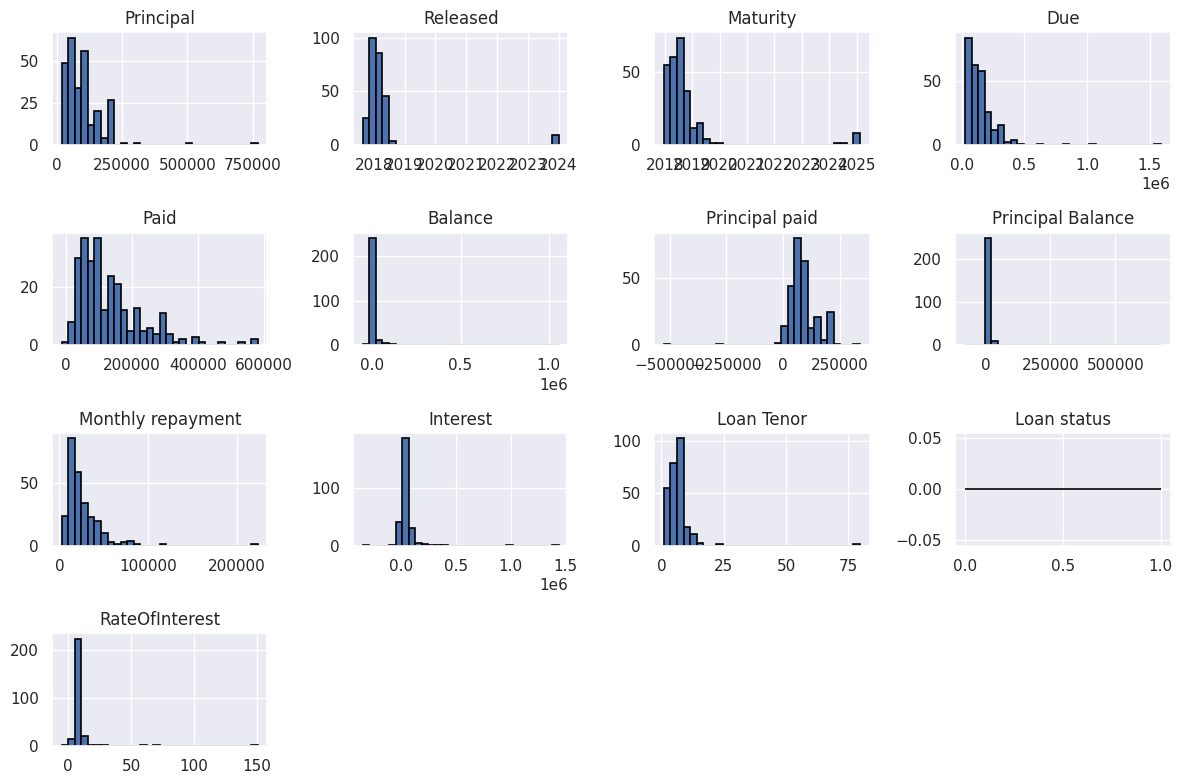

In [45]:
plt.figure(figsize=(12, 6))
copied_data.hist(bins=30, edgecolor='black', linewidth=1.2, figsize=(12, 8))
plt.tight_layout()
plt.show()

correlation matrix for understanding of relationships

Text(0.5, 1.0, 'Correlation Heatmap')

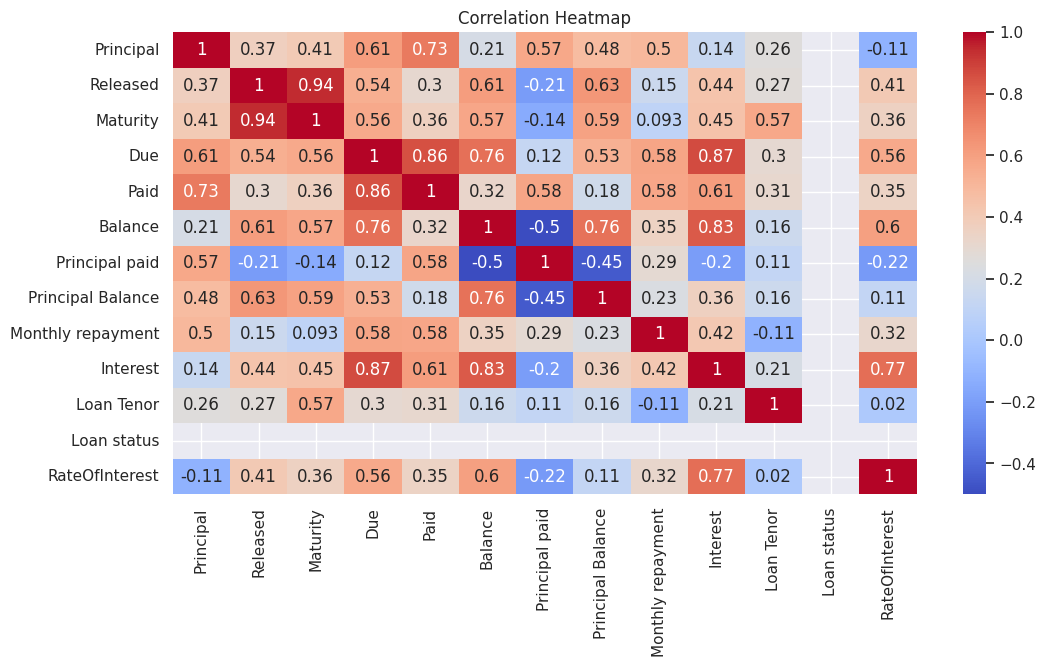

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(copied_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

now we are one-hot encoding the target variable:
Loan Status = Refundable(considered Closed), Active, Paused, Delinquent, Default, Current, Late

we are setting out conditions on what an account should be/look-like based on their activities or payment.

In [47]:

# Assign loan statuses based on conditions.
def assign_loan_status(row):
    if row['Balance'] < 0:
        return 'Refundable'
    elif row['Balance'] > 0 and row['Due'] > row['Paid']:
        return 'Active'
    elif row['Balance'] == 0 and row['Paid'] == row['Due']:
        return 'Current'
    elif row['Balance'] > 0 and row['Due'] < row['Paid']:
        return 'Late'
    elif row['Balance'] > 0 and row['Monthly repayment'] < (row['Due'] - row['Paid']):
        return 'Paused'
    elif row['Balance'] > 0 and row['Paid'] < (0.5 * row['Due']):
        return 'Delinquent'
    elif row['Balance'] > 0 and row['Paid'] == 0:
        return 'Default'
    return np.nan  # Fallback for unclassified rows

# Apply the loan status logic to the dataset.
copied_data['Loan status'] = copied_data.apply(assign_loan_status, axis=1)


In [48]:
# Define all possible loan statuses
all_statuses = ['Refundable', 'Active', 'Paused', 'Delinquent', 'Default', 'Current', 'Late']

# Use pandas get_dummies with explicit categories
copied_data = pd.get_dummies(
    copied_data,
    columns=['Loan status'],  # Assuming 'Loan status' is the original categorical column
    prefix='LoanStatus',
    dummy_na=False
)

# Add missing statuses as zero columns if they don't exist
for status in all_statuses:
    column_name = f"LoanStatus_{status}"
    if column_name not in copied_data.columns:
        copied_data[column_name] = 0  # Add column with default 0s

# Specify the columns with True/False values
bool_columns = ['LoanStatus_Active', 'LoanStatus_Current']
# Convert them to 0 and 1
copied_data[bool_columns] = copied_data[bool_columns].astype(int)


# Confirm the final columns
print("Encoded columns:", copied_data.columns.tolist())


Encoded columns: ['Principal', 'Released', 'Maturity', 'Due', 'Paid', 'Balance', 'Principal paid', 'Principal Balance', 'Monthly repayment', 'Interest', 'Loan Tenor', 'RateOfInterest', 'LoanStatus_Active', 'LoanStatus_Current', 'LoanStatus_Refundable', 'LoanStatus_Paused', 'LoanStatus_Delinquent', 'LoanStatus_Default', 'LoanStatus_Late']


In [49]:
print(copied_data.columns)


Index(['Principal', 'Released', 'Maturity', 'Due', 'Paid', 'Balance',
       'Principal paid', 'Principal Balance', 'Monthly repayment', 'Interest',
       'Loan Tenor', 'RateOfInterest', 'LoanStatus_Active',
       'LoanStatus_Current', 'LoanStatus_Refundable', 'LoanStatus_Paused',
       'LoanStatus_Delinquent', 'LoanStatus_Default', 'LoanStatus_Late'],
      dtype='object')


Feature Scaling and training phase

In [50]:
'''
dropped these values becoz later found out that the model won't take datetime values as input.
i put them in a new variable in case i might need them later
'''

date_time = copied_data[['Released', 'Maturity']]
copied_data.drop(['Released', 'Maturity'], axis=1, inplace=True)


In [51]:
x = copied_data.drop(['LoanStatus_Active', 'LoanStatus_Current',
                      'LoanStatus_Refundable',
                      'LoanStatus_Paused', 'LoanStatus_Delinquent',
                      'LoanStatus_Default', 'LoanStatus_Late'], axis=1)

y = copied_data[['LoanStatus_Active', 'LoanStatus_Current',
                 'LoanStatus_Refundable',
                      'LoanStatus_Paused', 'LoanStatus_Delinquent',
                      'LoanStatus_Default', 'LoanStatus_Late']]


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

0 - represents 'No'
1 - represents 'Yes'

In [54]:
y_pred = rf_model.predict(x_test)
print(y_pred)

[[0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]]


In [55]:
'''discovered rows with negative Balance values. meaning the customer overpaid or the amount is refundable.
we can consider the account closed. but we named it 'Refundable'. '''
#copied_data.iloc[171:172]
#copied_data.iloc[239:240]
copied_data.iloc[247:248]

,Principal,Due,Paid,Balance,Principal paid,Principal Balance,Monthly repayment,Interest,Loan Tenor,RateOfInterest,LoanStatus_Active,LoanStatus_Current,LoanStatus_Refundable,LoanStatus_Paused,LoanStatus_Delinquent,LoanStatus_Default,LoanStatus_Late
248,150000.0,262355.01,263124.99,-769.98,150000.0,0.0,26689.217701,112355.01,9.83,7.619872,0,0,True,0,0,0,0


In [56]:
bool_columns = ['LoanStatus_Refundable']
# Convert them to 0 and 1
copied_data[bool_columns] = copied_data[bool_columns].astype(int)

i want all rows that are refundable

In [57]:
for index, row in copied_data.iterrows():
    if row['LoanStatus_Refundable'] == 1:
        print(row)

Principal                50000.000000
Due                      64628.000000
Paid                     66632.000000
Balance                  -2004.000000
Principal paid           50000.000000
Principal Balance            0.000000
Monthly repayment        18308.215297
Interest                 14628.000000
Loan Tenor                   3.530000
RateOfInterest               8.287819
LoanStatus_Active            0.000000
LoanStatus_Current           0.000000
LoanStatus_Refundable        1.000000
LoanStatus_Paused            0.000000
LoanStatus_Delinquent        0.000000
LoanStatus_Default           0.000000
LoanStatus_Late              0.000000
Name: 100, dtype: float64
Principal                60000.000000
Due                      78300.000000
Paid                     86476.250000
Balance                  -8176.250000
Principal paid           60000.000000
Principal Balance            0.000000
Monthly repayment        23234.421365
Interest                 18300.000000
Loan Tenor              

Hyperparameter Tuning using GridSearchCV

In [58]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy',)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print('Hyperparameters: ', best_params)
best_model = grid_search.best_estimator_
print('Best Model: ', best_model)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Hyperparameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Model:  RandomForestClassifier(n_estimators=50, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


In [66]:
y_train_pred = best_model.predict(x_train)
print(y_train_pred)
y_test_pred = best_model.predict(x_test)
print(y_test_pred)

print('/n')

y_train_pred = grid_search.best_estimator_.predict(x_train)
print(y_train_pred)
y_test_pred = grid_search.best_estimator_.predict(x_test)
print(y_test_pred)


[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[[0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0

finding the accuracy of the training and testing

training accuracy

In [75]:
# Replace with your actual data
y_train = np.array([y_train])  # True labels
y_train_pred = np.array([y_train_pred])  # Predicted labels

# Ensure arrays are compatible
y_train = np.array(y_train).ravel()
y_train_pred = np.array(y_train_pred).ravel()

# Convert data types if necessary
y_train = y_train.astype(int)
y_train_pred = y_train_pred.astype(int)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', train_accuracy)

Training Accuracy: 1.0


testing accuracy

In [76]:
y_test = np.array([y_test])  # True labels
y_test_pred = np.array([y_test_pred])  # Predicted labels

# Ensure arrays are compatible
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

# Convert data types if necessary
y_test = y_test.astype(int)
y_test_pred = y_test_pred.astype(int)

test_accuracy = accuracy_score(y_test, y_test_pred)
print('Testing Accuracy:', test_accuracy)

Testing Accuracy: 0.9947089947089947


confusion matrix and classification report

In [77]:
print('Training Confusion Matrix:')
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

print('\nTesting Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Training Confusion Matrix:
[[1296    0]
 [   0  216]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1296
           1       1.00      1.00      1.00       216

    accuracy                           1.00      1512
   macro avg       1.00      1.00      1.00      1512
weighted avg       1.00      1.00      1.00      1512


Testing Confusion Matrix:
[[323   1]
 [  1  53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       0.98      0.98      0.98        54

    accuracy                           0.99       378
   macro avg       0.99      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378



Visualization of Confusion Matrix

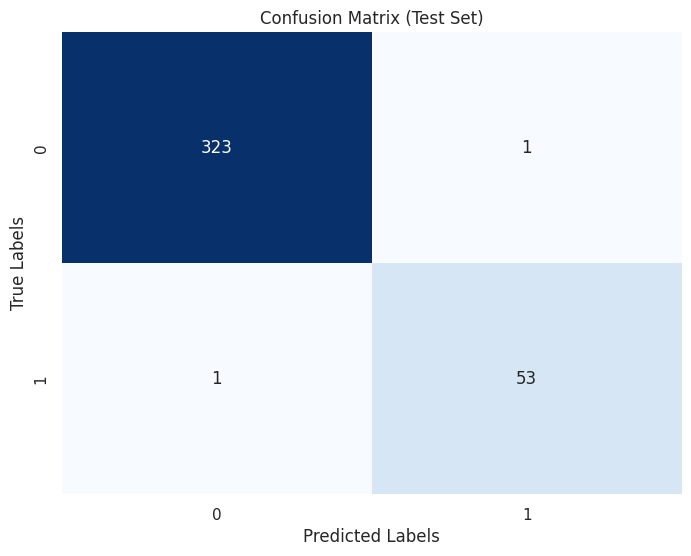

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Set)')
plt.show()

Feature Importance Plot

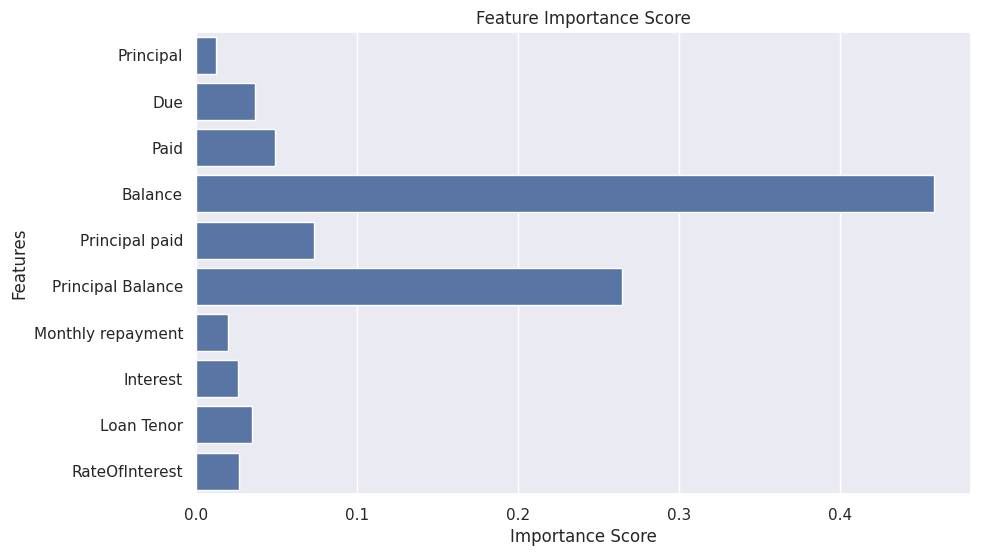

In [80]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance Score')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

plotting the random forest trees

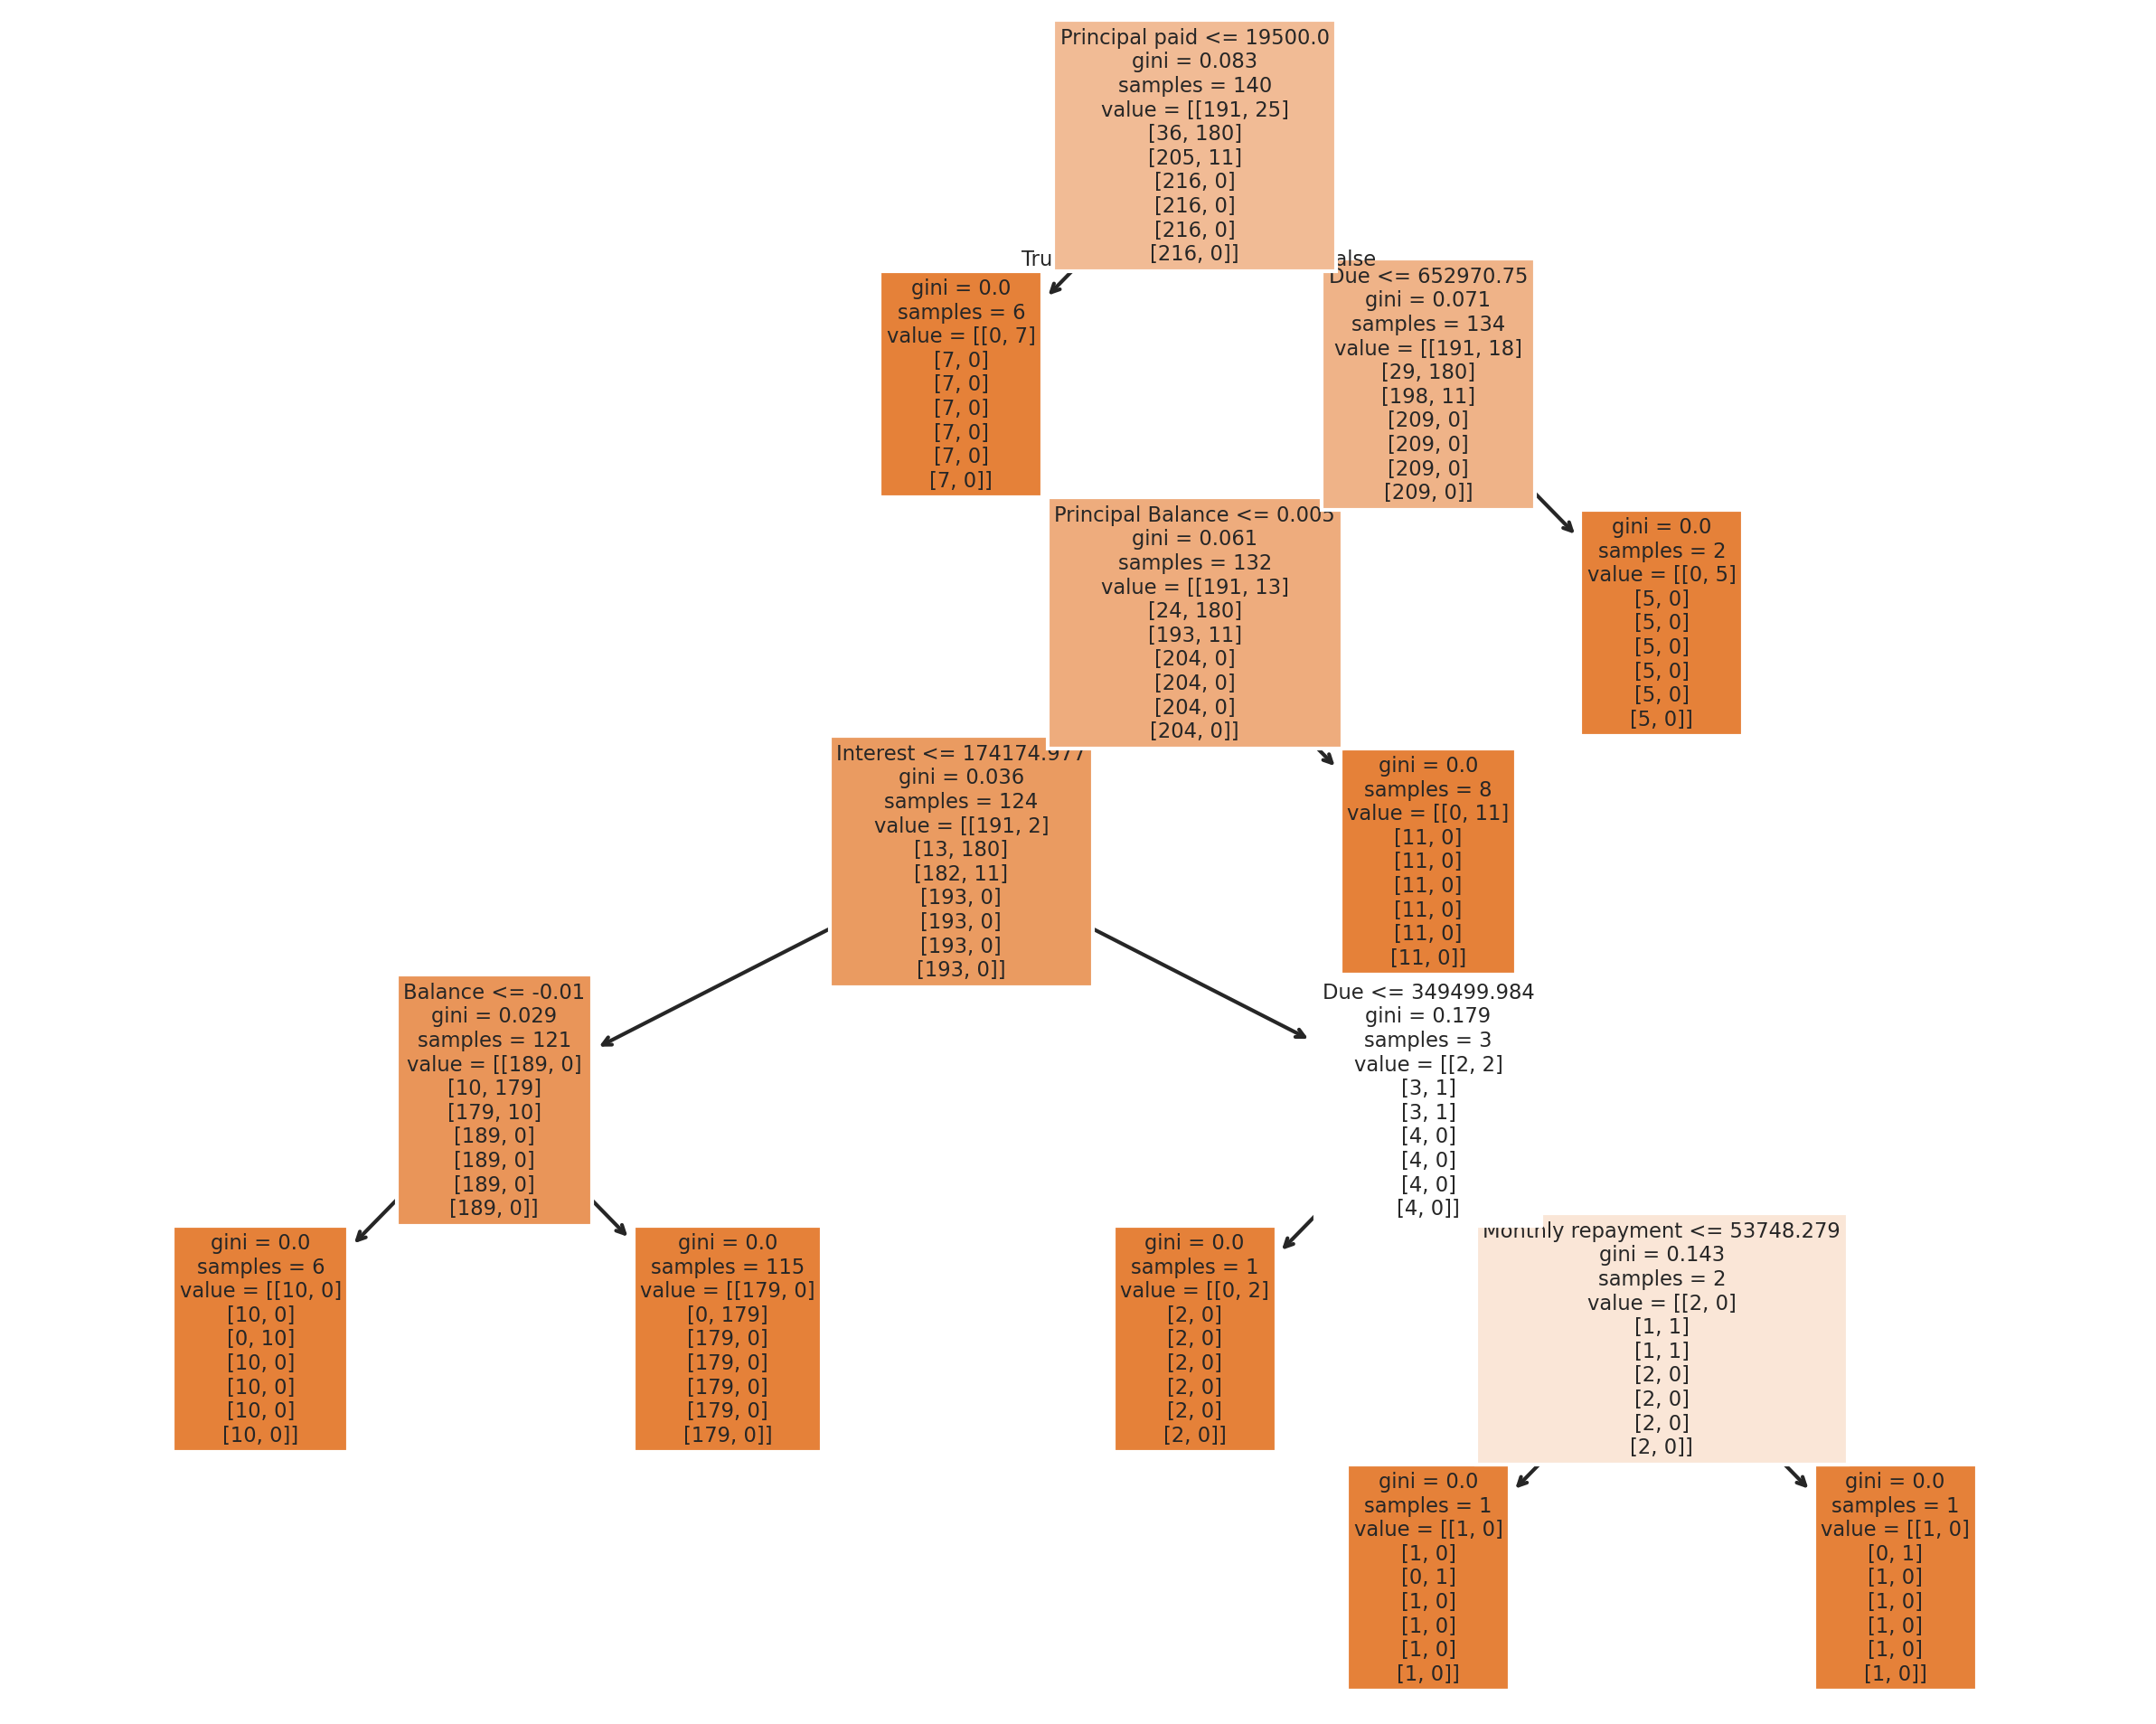

In [82]:
from sklearn import tree

fn = feature_names
cn = ['Refundable', 'Active', 'Current', 'Paused', 'Delinquent', 'Default', 'Late']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=300)
tree.plot_tree(best_model.estimators_[0],
              feature_names=fn,
              class_names=cn,
              filled=True)
fig.savefig('rf_individualtree.png')
